##Economic Freedom Summary Index Predictor##

The goal of this project is to create a model using machine learning to predict the Economic Freedom Summary Index for a given country based on other metrics of Economic Freedom provided. By doing so, the model can then show what factors are the most important, in terms of a higher rating, at determining the degree of economic freedom a country has. 

###Step 1: Upload###

To start, the data is uploaded and converted from a csv to a pandas DataFrame.

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import requests
from google.colab import files
data_to_load = files.upload()

Saving economicdata2018-2018.csv to economicdata2018-2018 (1).csv


In [43]:
import io
econ_data = pd.read_csv(io.BytesIO(data_to_load['economicdata2018-2018.csv']))
econ_data = econ_data.set_index('ISO_Code')
econ_data.describe()

,Economic Freedom Summary Index,Rank,Quartile,Government consumption,1A data,Transfers and subsidies,1B data,Government investment,1C data,Top marginal income tax rate,Top marginal income and payroll tax rate,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real property,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,data,Standard deviation of inflation,data.1,Inflation: Most recent year,data.2,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),data.3,Mean tariff rate,data.4,Standard deviation of tariff rates,data.5,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest rates),Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation
count,162.000000,162.000000,162.000000,162.000000,162.000000,155.000000,155.000000,153.000000,153.000000,162.000000,158.000000,162.000000,159.000000,162.00000,162.000000,162.000000,161.000000,137.000000,161.000000,162.000000,160.000000,157.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,154.000000,154.000000,160.00000,160.000000,160.000000,160.000000,161.000000,160.000000,162.000000,162.000000,162.000000,154.000000,161.000000,161.000000,162.000000,162.000000,151.000000,162.000000,162.000000,162.000000,162.000000,148.000000,148.000000,162.000000,159.000000,162.000000,162.000000,148.000000,162.000000,162.000000,159.000000,159.000000,162.000000,162.000000,162.000000
mean,6.860247,81.185185,2.481481,5.597716,21.201667,7.819677,8.490903,7.034248,25.850065,7.524691,5.563291,6.564815,6.291384,6.63321,4.727284,4.675926,5.653727,6.412409,5.894037,4.386481,7.604625,5.577070,0.869815,5.247037,8.664198,5.266481,8.489444,344.136173,9.004136,408.257407,6.944444,8.275494,8.427338,2.358247,8.24875,8.756250,5.928250,11.203250,7.530248,5.673062,6.565247,6.089630,9.455062,5.585065,3.527516,6.211491,5.102840,7.035556,7.589404,7.839012,9.012346,8.149012,6.414383,4.772703,6.480743,7.864198,6.486415,6.586420,6.439506,4.165405,5.378889,9.215247,5.844465,8.379623,7.330000,6.741667,7.110679
std,0.954460,46.949983,1.121347,2.294063,8.606734,1.965811,7.226346,3.285843,16.065051,2.317100,2.802259,2.357187,2.068365,1.18956,1.406572,1.224312,1.087930,2.711914,1.423116,1.520195,1.529615,1.911614,0.149240,1.378986,1.294818,7.674309,1.879393,4333.757215,1.505477,5135.906901,3.950391,1.460613,1.471803,2.208624,0.99869,4.993451,1.988053,11.979545,1.100889,0.997376,3.012564,1.834469,2.119550,3.754349,2.767439,3.481319,2.709658,1.413045,2.783934,2.835402,1.758697,1.584788,2.775378,1.214681,1.225257,1.944913,2.826056,4.224514,1.342865,1.255894,2.572886,0.858977,2.709509,1.146112,1.802141,1.251587,1.055879
min,3.340000,1.000000,1.000000,0.000000,4.440000,2.140000,0.120000,0.000000,2.070000,2.000000,0.000000,1.000000,0.970000,3.33000,1.730000,1.790000,2.880000,0.000000,2.490000,0.000000,2.670000,0.000000,0.360000,2.570000,1.000000,-13.890000,0.000000,0.150000,0.000000,-2.810000,0.000000,0.690000,2.570000,0.000000,3.50000,0.000000,0.000000,0.000000,4.020000,3.280000,0.000000,0.890000,0.000000,0.000000,0.000000,0.0

###Step 2: Prediction and Features###

Now that the data is uploaded, it needs to be split into the prediction target (denoted as y) and the features of that affect the prediction target (denoted as X).

In [44]:
y = econ_data['Economic Freedom Summary Index']
y

ISO_Code
AGO    4.75
ALB    7.80
ARE    7.05
ARG    5.78
ARM    7.92
       ... 
VNM    6.20
YEM    5.51
ZAF    6.73
ZMB    7.19
ZWE    5.12
Name: Economic Freedom Summary Index, Length: 162, dtype: float64

In [52]:
relevant_info = ['Government consumption', 'Transfers and subsidies',
                 'Government investment', 'Top marginal income tax rate',
                 'Top marginal income and payroll tax rate', 'Top marginal tax rate',
                 'State ownership of assets', 'Size of Government', 'Judicial independence',
                 'Impartial courts', 'Protection of property rights', 'Military interference in rule of law and politics',
                 'Integrity of the legal system', 'Legal enforcement of contracts',
                 'Regulatory restrictions on the sale of real property', 
                 'Reliability of police', 'Gender Legal Rights Adjustment',
                 'Legal System & Property Rights', 'Money growth',
                 'Standard deviation of inflation', 'Inflation: Most recent year',
                 'Freedom to own foreign currency bank accounts', 'Sound Money',
                 'Revenue from trade taxes (% of trade sector)', 'Mean tariff rate',
                 'Standard deviation of tariff rates', 'Tariffs', 'Non-tariff trade barriers',
                 'Compliance costs of importing and exporting', 'Regulatory trade barriers',
                 'Black market exchange rates', 'Financial Openness', 'Capital controls',
                 'Freedom of foreigners to visit',
                 'Controls of the movement of capital and people',
                 'Freedom to Trade Internationally',	'Ownership of banks',
                 'Private sector credit',	'Interest rate controls/negative real interest rates)',
                 'Credit market regulations',	'Hiring regulations and minimum wage',
                 'Hiring and firing regulations',	'Centralized collective bargaining',
                 'Hours Regulations',	'Mandated cost of worker dismissal',
                 'Conscription',	'Labor market regulations',
                 'Administrative requirements',	'Regulatory Burden',
                 'Starting a business',	'Impartial Public Administration',
                 'Licensing restrictions',	'Tax compliance',
                 'Business regulations',	'Regulation']
X = econ_data[relevant_info]
X

,Government consumption,Transfers and subsidies,Government investment,Top marginal income tax rate,Top marginal income and payroll tax rate,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real property,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,Standard deviation of inflation,Inflation: Most recent year,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),Mean tariff rate,Standard deviation of tariff rates,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest rates),Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation
ISO_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AGO,7.70,9.62,6.33,10,9.0,9.5,3.38,7.31,3.17,3.22,4.17,3.3,4.87,2.30,5.52,3.81,0.81,3.43,9.87,2.98,5.96,0,4.70,9.24,8.16,4.41,7.27,4.70,2.51,3.60,0.0,0.00,2.31,0.11,0.81,2.92,5.0,6.53,4,5.18,10.00,4.43,6.97,4,6.63,0,5.34,2.94,2.44,8.73,5.04,7.92,6.78,5.64,5.39
ALB,8.16,6.74,8.00,9,7.0,8.0,9.54,8.09,3.56,3.65,4.94,8.3,5.71,3.91,6.72,5.61,0.95,5.17,9.96,9.74,9.59,10,9.82,9.67,9.28,8.10,9.02,6.81,9.41,8.11,10.0,4.16,4.62,8.30,5.69,8.20,10.0,9.21,10,9.74,5.57,4.87,5.58,8,6.30,10,6.72,5.65,6.67,9.74,5.40,5.62,7.18,6.71,7.72
ARE,4.29,8.18,0.00,10,10.0,10.0,3.93,5.28,5.30,6.65,6.12,8.3,6.11,5.83,9.91,8.61,0.48,5.25,9.72,6.81,9.39,10,8.98,10.00,9.04,6.31,8.45,7.11,8.33,7.72,10.0,10.00,5.38,5.31,6.90,8.27,5.0,10.00,8,7.67,10.00,6.93,7.38,6,10.00,0,6.72,7.03,5.78,9.69,7.25,10.00,8.70,8.07,7.49
ARG,5.94,6.31,7.59,7,1.0,4.0,6.41,6.05,4.27,4.26,5.63,7.5,4.78,3.82,6.86,4.41,0.79,4.63,5.67,6.45,3.14,5,5.07,7.11,7.28,5.92,6.77,5.07,5.65,5.36,10.0,7.60,6.92,7.97,7.49,7.41,5.0,4.26,8,5.75,2.77,2.24,3.19,10,2.52,10,5.12,2.71,6.67,9.58,7.20,5.73,6.51,6.40,5.76
ARM,7.72,7.71,9.30,5,5.0,5.0,9.51,7.85,4.01,4.89,6.02,5.8,5.45,5.20,9.82,6.67,1.00,5.98,9.11,9.62,9.50,10,9.56,9.03,8.70,7.58,8.44,5.69,9.32,7.50,10.0,8.34,5.38,10.00,7.91,8.46,10.0,8.64,10,9.55,6.67,5.60,7.25,10,9.25,0,6.46,5.17,6.00,9.86,6.30,9.30,7.04,7.28,7.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,9.19,NaN,4.54,7,5.0,6.0,5.66,6.35,2.93,4.39,5.22,5.0,5.60,5.09,8.79,5.30,0.77,4.69,8.96,9.26,9.29,0,6.88,9.12,8.10,5.36,7.53,4.88,5.75,5.32,10.0,4.16,0.77,0.77,1.90,6.19,NaN,7.91,10,8.95,7.77,5.46,6.53,10,2.52,0,5.38,3.98,6.22,9.43,5.01,8.21,5.70,6.43,6.92
YEM,8.63,9.02,NaN,10,8.0,9.0,3.81,7.61,2.27,2.68,3.48,4.2,3.51,3.78,9.05,3.43,0.66,3.36,9.91,3.24,4.48,10,6.91,8.92,8.48,7.81,8.40,4.05,10.00,7.02,0.0,10.00,6.92,1.00,5.97,5.35,NaN,0.00,5,2.50,8.90,3.37,7.00,8,2.52,10,6.63,2.94,0.00,8.28,0.53,NaN,7.22,3.79,4.31
ZAF,4.06,8.67,3.79,7,5.0,6.0,8.02,6.11,5.99,5.26,5.56,8.3,4.77,4.96,6.94,3.65,1.00,5.68,9.17,9.55,9.10,5,8.20,8.74,8.46,4.21,7.14,5.44,4.68,5.06,10.0,1.66,0.77,8.30,3.57,6.44,10.0,7.53,10,9.18,5.57,3.13,4.11,8,8.27,10,6.51,3.36,3.33,8.72,4.68,8.39,7.65,6.02,7.24


###Step 3: Training and Test Data###

The data is now split into training and test data whereby machine learning can occur.

In [32]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [33]:
train_X

,Government consumption,Transfers and subsidies,Government investment,Top marginal income tax rate,Top marginal income and payroll tax rate,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real property,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,Standard deviation of inflation,Inflation: Most recent year,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),Mean tariff rate,Standard deviation of tariff rates,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest rates),Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation
ISO_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRN,0.00,NaN,0.00,10,10.0,10.0,NaN,3.33,5.63,5.16,5.53,8.3,8.30,4.17,4.80,6.47,0.79,5.40,9.38,5.09,9.79,10,8.56,NaN,9.96,9.29,9.62,5.10,2.34,3.72,10.00,NaN,6.15,4.31,5.23,7.14,NaN,8.26,9,8.63,10.00,4.91,7.82,10,10.00,10,8.79,3.89,8.44,9.81,NaN,9.56,9.41,8.22,8.55
MEX,7.28,8.75,10.00,8,8.0,8.0,7.89,8.38,4.19,3.79,5.89,5.0,4.13,5.07,7.33,2.47,1.00,4.73,8.93,9.56,9.02,5,8.13,9.76,8.60,5.86,8.07,6.11,8.46,7.29,10.00,6.99,1.54,7.30,5.28,7.66,8.0,9.08,10,9.03,6.67,4.05,7.00,8,4.82,3,5.59,3.11,5.78,9.57,5.50,9.56,7.30,6.80,7.14
ISL,2.44,7.95,10.00,3,2.0,2.5,6.97,5.97,7.01,7.01,7.49,10.0,8.61,6.78,8.75,9.02,1.00,8.08,8.82,9.18,9.46,10,9.37,9.89,9.14,1.68,6.90,5.47,8.78,7.12,10.00,6.99,1.54,7.74,5.43,7.36,2.0,9.68,10,7.23,5.57,7.15,4.70,8,10.00,10,7.57,5.00,8.22,9.59,9.80,9.55,8.43,8.43,7.74
NPL,7.58,9.21,7.18,5,5.0,5.0,5.63,6.92,4.34,3.82,5.15,NaN,6.17,3.34,7.98,5.10,0.81,4.64,9.14,9.27,9.16,0,6.89,5.00,7.58,5.60,6.06,4.86,7.94,6.40,10.00,1.66,0.00,10.00,3.89,6.59,8.0,10.00,10,9.33,6.67,4.03,5.60,10,2.60,10,6.48,3.55,5.78,9.07,4.38,8.98,5.77,6.25,7.36
THA,4.44,9.21,6.91,8,8.0,8.0,6.43,7.00,4.78,4.55,5.26,3.3,4.48,5.26,7.46,4.37,0.83,4.52,9.81,9.68,9.79,5,8.57,9.69,8.08,4.32,7.36,5.69,7.99,6.84,10.00,1.66,1.54,6.08,3.09,6.82,8.0,9.84,10,9.28,5.57,5.57,5.64,10,1.37,0,4.69,4.58,7.11,9.78,1.25,9.08,7.43,6.54,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEL,2.68,2.14,10.00,2,0.0,1.0,8.68,4.90,6.68,6.33,7.28,10.0,7.62,6.53,4.90,7.60,1.00,7.12,7.89,9.83,9.59,10,9.33,9.13,8.96,6.26,8.12,5.64,9.98,7.81,10.00,10.00,3.85,7.74,7.20,8.28,8.0,9.64,10,9.21,8.90,3.75,5.85,6,10.00,10,7.42,3.50,8.44,9.78,10.00,7.46,8.48,7.94,8.19
MRT,4.03,NaN,8.73,5,5.0,5.0,6.89,6.16,2.84,3.01,3.76,NaN,4.68,6.27,7.59,6.23,0.61,3.96,9.64,8.07,9.39,5,8.02,NaN,7.58,7.19,7.39,3.30,5.57,4.43,10.00,1.66,3.33,1.00,2.00,5.95,10.0,8.52,9,9.17,5.57,3.45,6.02,8,7.94,5,6.00,2.54,2.67,9.64,3.59,9.21,6.97,5.77,6.98
IND,7.09,8.44,7.15,6,6.0,6.0,7.10,7.16,5.50,5.04,5.85,6.7,6.50,4.43,6.34,5.34,0.78,5.07,9.82,9.51,9.03,5,8.34,7.65,6.58,2.68,5.64,5.76,7.35,6.55,10.00,1.66,0.00,0.33,0.66,5.71,2.0,7.65,10,6.55,6.67,5.26,6.28,4,6.30,10,6.42,5.18,3.56,9.37,5.24,9.18,7.18,6.62,6.53


In [34]:
train_y

ISO_Code
BRN    6.60
MEX    7.21
ISL    7.71
NPL    6.48
THA    6.75
       ... 
BEL    7.56
MRT    6.22
IND    6.56
PAN    7.80
ETH    5.61
Name: Economic Freedom Summary Index, Length: 121, dtype: float64

In [35]:
val_X.describe()

,Government consumption,Transfers and subsidies,Government investment,Top marginal income tax rate,Top marginal income and payroll tax rate,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real property,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,Standard deviation of inflation,Inflation: Most recent year,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),Mean tariff rate,Standard deviation of tariff rates,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest rates),Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation
count,41.000000,38.000000,37.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,36.000000,41.000000,41.000000,39.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,39.000000,40.000000,40.000000,40.000000,41.000000,41.000000,41.000000,41.000000,39.000000,41.000000,40.000000,41.000000,41.000000,39.000000,41.000000,41.000000,41.000000,41.000000,38.000000,38.000000,41.000000,40.000000,41.000000,41.000000,38.000000,41.000000,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000
mean,5.299512,7.892632,7.278108,7.658537,5.902439,6.780488,6.147561,6.615122,4.955610,4.827073,5.817561,6.686111,5.924146,4.398537,7.659744,5.681750,0.892439,5.395610,8.756829,8.410488,9.327073,8.170732,8.665610,8.800769,8.473500,6.077000,7.764500,6.020976,6.845610,6.432927,9.459756,5.754359,4.090732,6.959500,5.649512,7.291951,7.871795,7.812439,9.073171,8.255854,6.332683,4.905263,6.718158,7.951220,6.322750,7.073171,6.563171,4.437368,5.702195,9.262195,6.048293,8.199500,7.105854,6.788537,7.203659
std,2.388738,1.843923,3.565708,2.242875,2.835532,2.337330,2.159123,1.220521,1.343856,1.268955,1.015955,2.492750,1.495936,1.510857,1.338911,2.065509,0.134662,1.378309,0.992170,1.912224,0.704032,3.308341,1.144592,1.296955,0.830723,2.229516,1.077173,1.037202,2.942537,1.799659,2.194630,3.608815,2.552316,2.926688,2.452800,1.451641,2.577019,3.329908,1.587297,1.626415,3.196436,1.573005,1.044716,1.922904,2.789786,4.045925,1.314883,1.546729,2.482356,0.733882,2.617005,1.172147,2.159775,1.284483,1.026956
min,0.000000,3.900000,0.000000,3.000000,0.000000,2.000000,1.300000,4.450000,2.600000,2.640000,3.770000,1.700000,3.160000,0.000000,4.460000,1.400000,0.550000,3.270000,6.010000,2.630000,6.730000,0.000000,4.900000,3.270000,6.180000,0.000000,4.820000,3.930000,0.000000,2.010000,0.000000,0.000000,0.000000,0.220000,0.920000,1.980000,0.000000,0.000000,4.000000,3.670000,0.000000,2.050000,4.110000,4.000000,0.000000,0.000000,3.600000,1.580000,0.000000,6.900000,0.520000,5.000000,0.000000,2.670000,4.800000
25%,4.130000,6.517500,5.760000,5.000000,4.000000,5.000000,4.610000,5.650000,3.860000,3.790000,5.100000,4.800000,4.770000,3.330000,6.945000,4.100000,0.820000,4.350000,7.960000,8.240000,9.240000,5.000000,8.210000,8.565000,7.860000,5.702500,7.125000,5.440000,4.540000,4.960000,10.000000,1.660000,1.540000,5.447500,3.850000,6.810000,5.000000,7.530000,9.000000,7.530000,4.430000,3.642500,6.055000,6.000000,4.712500,3.000000,5.660000,3.445000,

###Step 4: Data Preprocessing and Model fitting###

Now that the data is organized, the last step to take before fitting the model is to preprocess it. In this case, the only necessary step to take is to impute values into the columns where none exist. This particular model will be a random forest model, and will 

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

def mae(n, train_X, train_y, val_X, val_y):
  """
  Takes the number of estimators for the random forest and the training and test
  data and returns the mean absolute error of the model
  """
  numerical_transformer = SimpleImputer(strategy = 'constant')

  preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer,
                                                  relevant_info)])

  model = RandomForestRegressor(n_estimators=n, random_state=0)

  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

  my_pipeline.fit(train_X, train_y)

  preds = my_pipeline.predict(val_X)

  mae_val = mean_absolute_error(val_y, preds)
  return mae_val

for num in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]:
  print('n =', num, 'MAE:', mae(num, train_X, train_y, val_X, val_y))


n = 50 MAE: 0.20094146341463417
n = 100 MAE: 0.20348780487804852
n = 150 MAE: 0.19914959349593478
n = 200 MAE: 0.19802804878048752
n = 250 MAE: 0.20058926829268234
n = 300 MAE: 0.1979837398373978
n = 350 MAE: 0.19923414634146341
n = 400 MAE: 0.19948048780487834
n = 450 MAE: 0.19877398373983787
n = 500 MAE: 0.19824292682926858


Since the mean absolute error was not significantly affected by the number of trees, 300 yielded the lowest MAE and was thus picked for the number of trees in the random forest.

###Step 5: Final Model###

With the the model ready to go, the full set of data was input into the fit function.

In [75]:
numerical_transformer = SimpleImputer(strategy = 'constant')

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer,
                                                  relevant_info)])

model = RandomForestRegressor(n_estimators=300, random_state=0)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

my_pipeline.fit(X, y)

preds = my_pipeline.predict(X)

main_mae = mean_absolute_error(y, preds)
print(main_mae)

0.07516934156378377


###Step 6: Feature Sensitivity Analysis###

With the MAE calculated for the full model, the last step of this analysis is to re-run the model with one feature removed each time. By calculating the MAE for each of these runs, the higher the MAE from the model, the greater the sensitivity the EFSI has to that specific feature of a national economy.

In [59]:
list_mae = []

for var in relevant_info:
  new_X = X.drop(columns = var)
  relevant_info2 = relevant_info.copy()
  relevant_info2.remove(var)
  preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer,
                                                  relevant_info2)])
  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

  my_pipeline.fit(new_X, y)

  pred = my_pipeline.predict(new_X)
  list_mae.append(mean_absolute_error(y, pred))

[0.07675226337448325, 0.07574609053497673, 0.07654444444444279, 0.07615925925925744, 0.07631872427983341, 0.0760034979423853, 0.07618662551440138, 0.07856995884773456, 0.07564526748971029, 0.07560123456789976, 0.07480370370370162, 0.0745106995884754, 0.07541995884773496, 0.07510946502057429, 0.07469609053497693, 0.07538703703703546, 0.07522181069958596, 0.07829485596707662, 0.07634012345678828, 0.07751440329217903, 0.07548045267489464, 0.07677489711933996, 0.08739629629629275, 0.0766312757201627, 0.07587736625514337, 0.07605370370370154, 0.0763864197530848, 0.07648930041152137, 0.07533271604938066, 0.07558662551440165, 0.07644958847736312, 0.07607818930040991, 0.07565781893003855, 0.07576481481481348, 0.07546604938271395, 0.07967201646090324, 0.07596810699588302, 0.07650925925925725, 0.07583415637859864, 0.07712654320987446, 0.07635493827160265, 0.07574876543209698, 0.0763839506172816, 0.07518477366254978, 0.07584609053497715, 0.07601481481481331, 0.07572098765431912, 0.075864403292179

From this list, the 5 models with the largest mean absolute error were identified and visualized.

In [69]:
comp = pd.Series(list_mae, index=relevant_info)
comp = comp.sort_values()

In [70]:
comp['Legal System & Property Rights':'Sound Money']

Legal System & Property Rights      0.078295
Size of Government                  0.078570
Freedom to Trade Internationally    0.079672
Regulation                          0.082221
Sound Money                         0.087396
dtype: float64

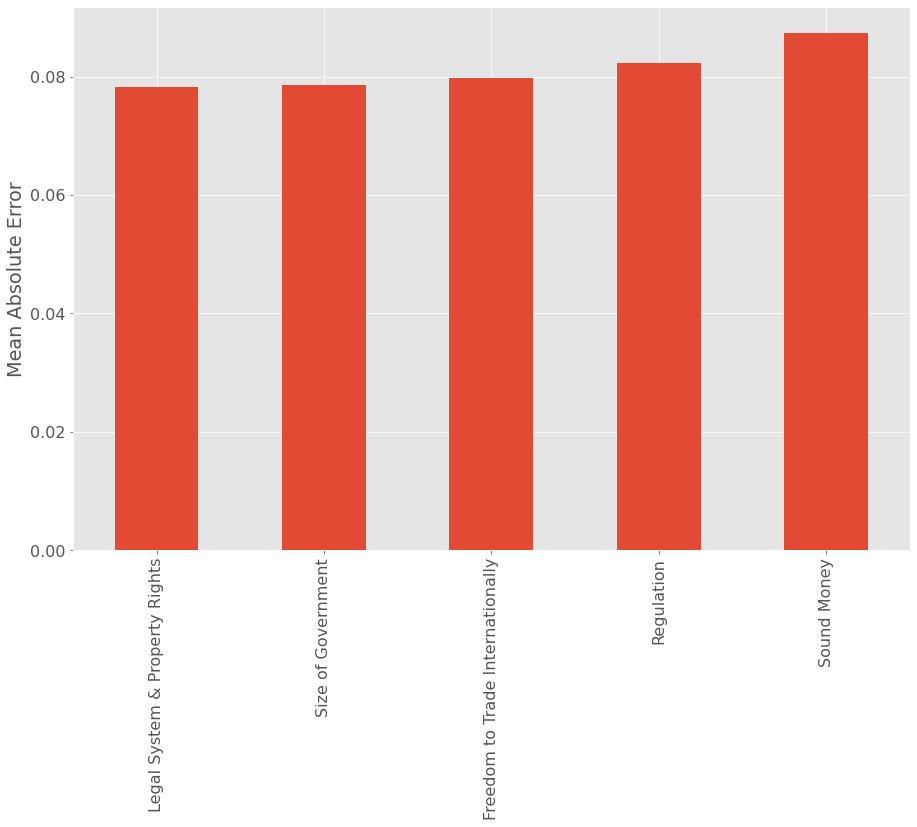

In [79]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10) 
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
fig = comp['Legal System & Property Rights':'Sound Money'].plot(kind = 'bar')
fig.set_ylabel('Mean Absolute Error')
fig

To show the impact these five features had on the accuracy of the model, a model fitted without those features was created and the MAE was compared to that of the primary model.

In [76]:
rem_cols = ['Sound Money', 'Regulation',
                            'Freedom to Trade Internationally',
                            'Size of Government',
                            'Legal System & Property Rights']
new_X = X.drop(columns = rem_cols)  
relevant_info2 = relevant_info.copy()
for col in rem_cols:
  relevant_info2.remove(col)

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer,
                                                  relevant_info2)])
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

my_pipeline.fit(new_X, y)

pred = my_pipeline.predict(new_X)
down_5_mae = mean_absolute_error(y, pred)
print(down_5_mae)

0.10546378600822731


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


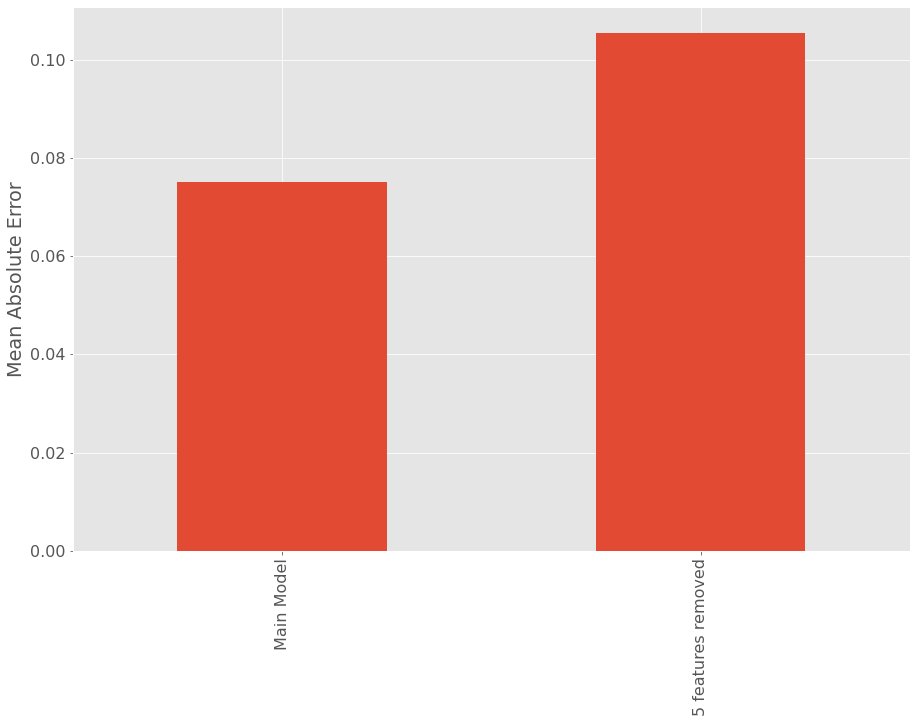

In [78]:
comp2 = pd.Series([main_mae, down_5_mae], index = ['Main Model', '5 features removed'])
fig2 = comp2.plot(kind = 'bar')
fig2.set_ylabel('Mean Absolute Error')
fig2

Based on the findings from the model, the 5 most significant factors in determining the EFSI for any given country are the following:

1. Sound Money (how immune the national money is to sudden appreciation or depreciation)
2. Regulation (how well regulated the market economy is)
3. Freedom to Trade Internationally
4. Size of Government
5. Legal Systems and Property Rights (How well property rights are defined and enforced)

These factors also happen to be the exact 5 factors shown on the Fraser Institute's main webpage for showing the EFSI for each country measured, indicating that the model was correct in identifying those features as the most important. [Fraser Institute Economic Freedom Rankings](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&sort-field=-calculated_ranking&sort-reversed=1)